# Loading and Inspecting the Dataset

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# Import essential libraries for data manipulation, visualization, and analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/league-of-legends-champions/LoL_champions.csv


# Loading and Inspecting the Dataset
*Review the first few records to understand the structure and contents of the dataset.*

In [2]:
# Load the dataset from the specified CSV file and display the first few rows
df = pd.read_csv('/kaggle/input/league-of-legends-champions/LoL_champions.csv')
df.head()

,Name,Tags,Role,Range type,Resourse type,Base HP,HP per lvl,Base mana,Mana per lvl,Movement speed,...,Attack range,HP regeneration,HP regeneration per lvl,Mana regeneration,Mana regeneration per lvl,Attack damage,Attack damage per lvl,Attack speed per lvl,Attack speed,AS ratio
0,Aatrox,Fighter,Top,Melee,Blood Well,650,114,0,0.0,345,...,175,3.00,0.50,0.0,0.0,60,5.00,2.500,0.651,0.651
1,Ahri,"Mage,Assassin",Middle,Ranged,Mana,590,104,418,25.0,330,...,550,2.50,0.60,8.0,0.8,53,3.00,2.200,0.668,0.625
2,Akali,Assassin,"Top,Middle",Melee,Energy,600,119,200,0.0,345,...,125,9.00,0.90,50.0,0.0,62,3.30,3.200,0.625,0.625
3,Akshan,"Marksman,Assassin",Middle,Ranged,Mana,630,107,350,40.0,330,...,500,3.75,0.65,8.2,0.7,52,3.00,4.000,0.638,0.400
4,Alistar,"Tank,Support",Support,Melee,Mana,685,120,350,40.0,330,...,125,8.50,0.85,8.5,0.8,62,3.75,2.125,0.625,0.625


# Dataset Information
*Check for missing values and ensure all data types are as expected.*

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Name                       167 non-null    object 
 1   Tags                       167 non-null    object 
 2   Role                       167 non-null    object 
 3   Range type                 167 non-null    object 
 4   Resourse type              160 non-null    object 
 5   Base HP                    167 non-null    int64  
 6   HP per lvl                 167 non-null    int64  
 7   Base mana                  167 non-null    int64  
 8   Mana per lvl               167 non-null    float64
 9   Movement speed             167 non-null    int64  
 10  Base armor                 167 non-null    int64  
 11  Armor per lvl              167 non-null    float64
 12  Base magic resistance      167 non-null    int64  
 13  Magic resistance per lvl   167 non-null    float64

# Unique Values in 'Range type'
*Confirm the distinct range types available (e.g., Melee, Ranged) to correctly filter and analyze data.*

In [4]:
df['Range type'].unique()

array(['Melee', 'Ranged'], dtype=object)

# Filtering Top Champions by Various Metrics
*Categorize champions based on their performance in different attributes to facilitate comparative analysis.*

In [5]:
top_5_melee_damage = df[df['Range type'] == 'Melee'].nlargest(5, 'Attack damage')
top_5_ranged_damage = df[df['Range type'] == 'Ranged'].nlargest(5, 'Attack damage')
top_5_melee_attack_speed = df[df['Range type'] == 'Melee'].nlargest(5, 'Attack speed')
top_5_ranged_attack_speed = df[df['Range type'] == 'Ranged'].nlargest(5, 'Attack speed')
top_5_highest_movement_speed = df.nlargest(5, 'Movement speed')
top_5_lowest_movement_speed = df.nsmallest(5, 'Movement speed')
top_5_lowest_hp = df.nsmallest(5, 'Base HP')
top_5_highest_hp = df.nlargest(5, 'Base HP')

# Plotting Top Champions by Various Metrics
*Compare performance metrics between melee and ranged champions to identify which champions excel in specific areas.*

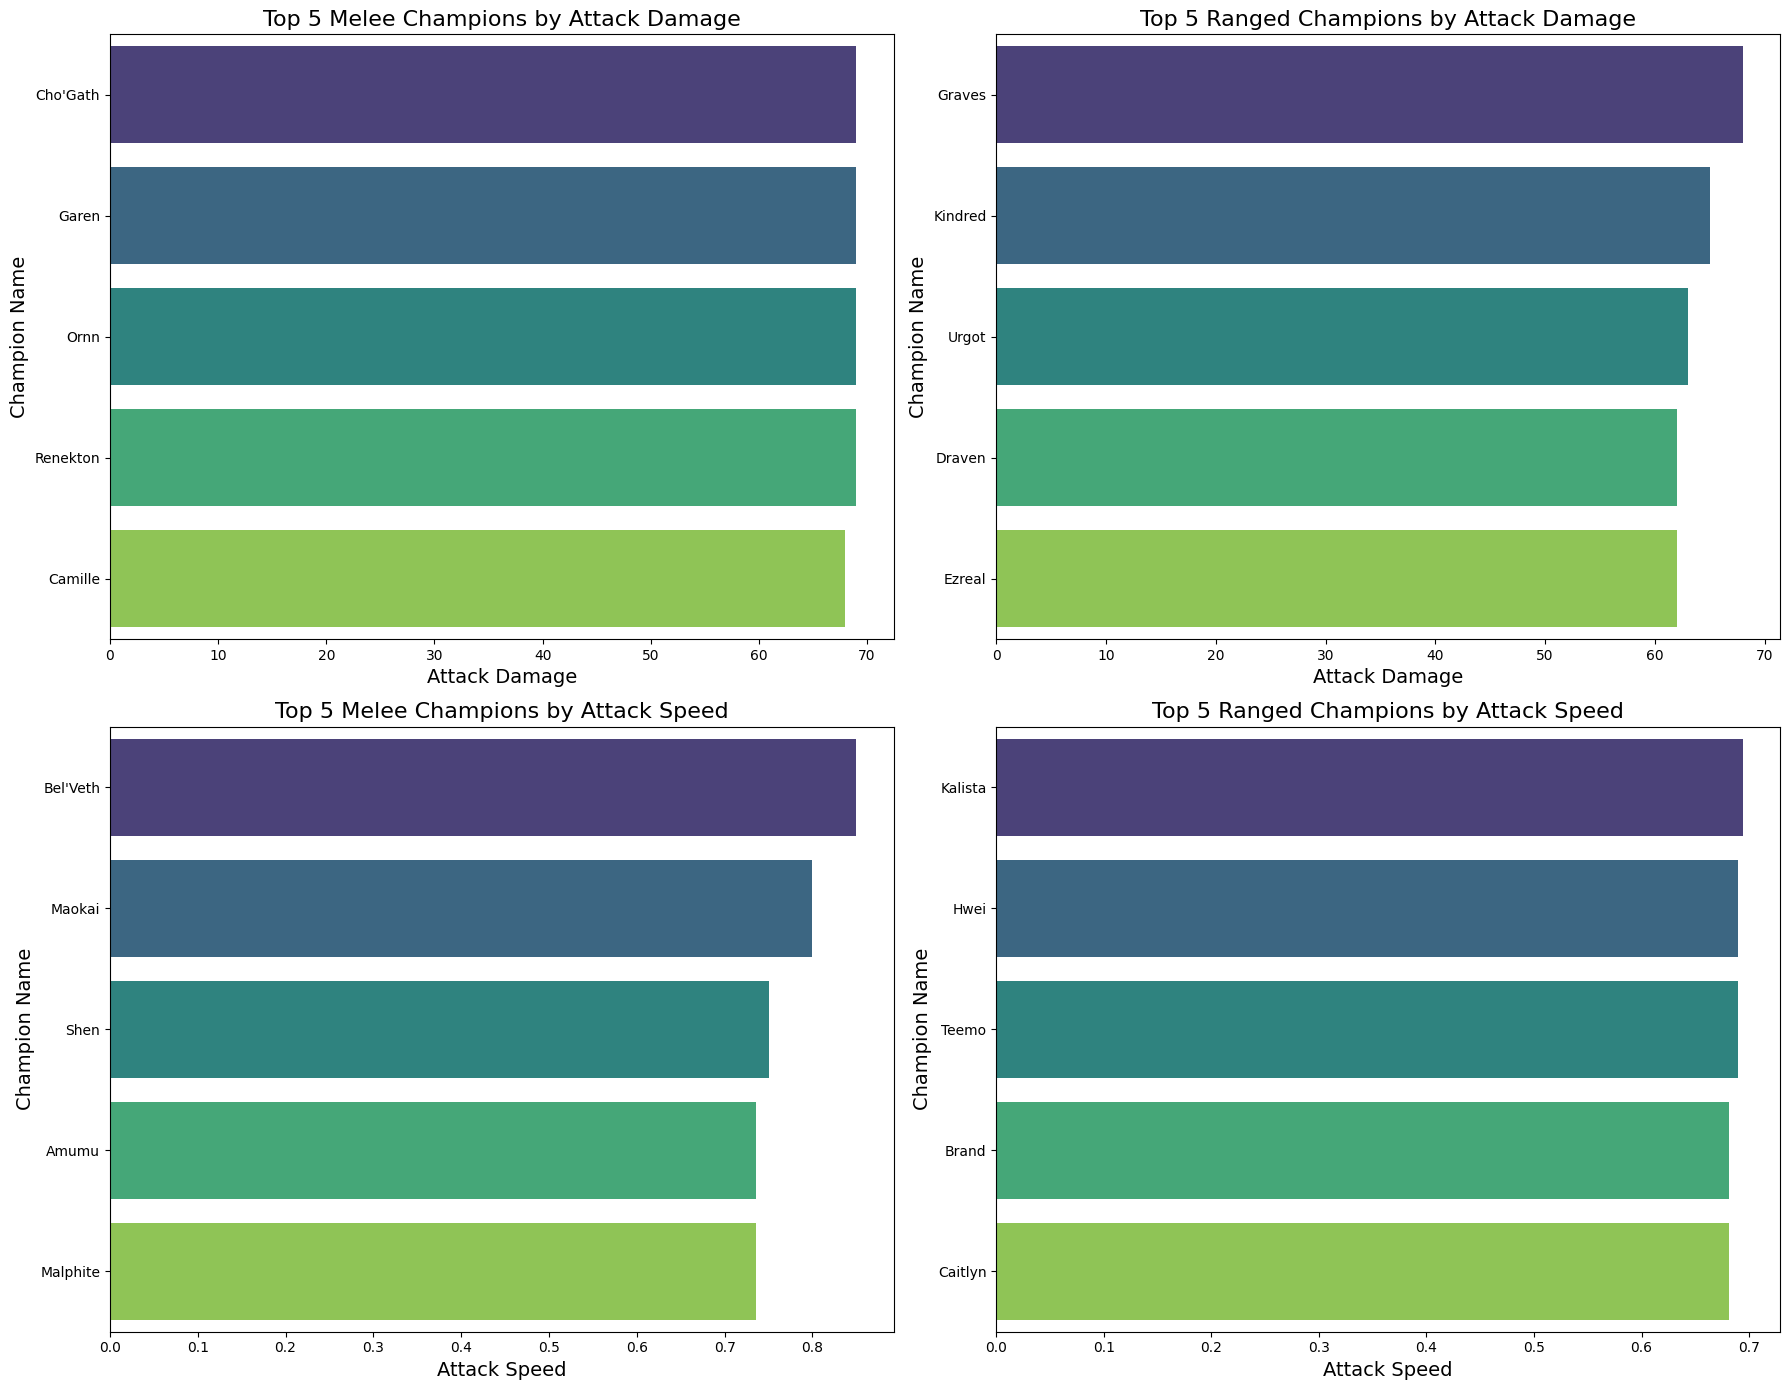

In [6]:
palette = sns.color_palette("viridis", 5)

# Plotting
fig, axes = plt.subplots(2, 2, figsize=(18, 14))

# Plot for top 5 melee champions by damage
sns.barplot(ax=axes[0, 0], x='Attack damage', y='Name', data=top_5_melee_damage, palette=palette)
axes[0, 0].set_title('Top 5 Melee Champions by Attack Damage', fontsize=16)
axes[0, 0].set_xlabel('Attack Damage', fontsize=14)
axes[0, 0].set_ylabel('Champion Name', fontsize=14)

# Plot for top 5 ranged champions by damage
sns.barplot(ax=axes[0, 1], x='Attack damage', y='Name', data=top_5_ranged_damage, palette=palette)
axes[0, 1].set_title('Top 5 Ranged Champions by Attack Damage', fontsize=16)
axes[0, 1].set_xlabel('Attack Damage', fontsize=14)
axes[0, 1].set_ylabel('Champion Name', fontsize=14)

# Plot for top 5 melee champions by attack speed
sns.barplot(ax=axes[1, 0], x='Attack speed', y='Name', data=top_5_melee_attack_speed, palette=palette)
axes[1, 0].set_title('Top 5 Melee Champions by Attack Speed', fontsize=16)
axes[1, 0].set_xlabel('Attack Speed', fontsize=14)
axes[1, 0].set_ylabel('Champion Name', fontsize=14)

# Plot for top 5 ranged champions by attack speed
sns.barplot(ax=axes[1, 1], x='Attack speed', y='Name', data=top_5_ranged_attack_speed, palette=palette)
axes[1, 1].set_title('Top 5 Ranged Champions by Attack Speed', fontsize=16)
axes[1, 1].set_xlabel('Attack Speed', fontsize=14)
axes[1, 1].set_ylabel('Champion Name', fontsize=14)

# Adjust layout
plt.tight_layout()
plt.show()

# Plotting HP and Movement Speed Metrics
*Analyze how base HP and movement speed vary among champions to understand their durability and agility.*

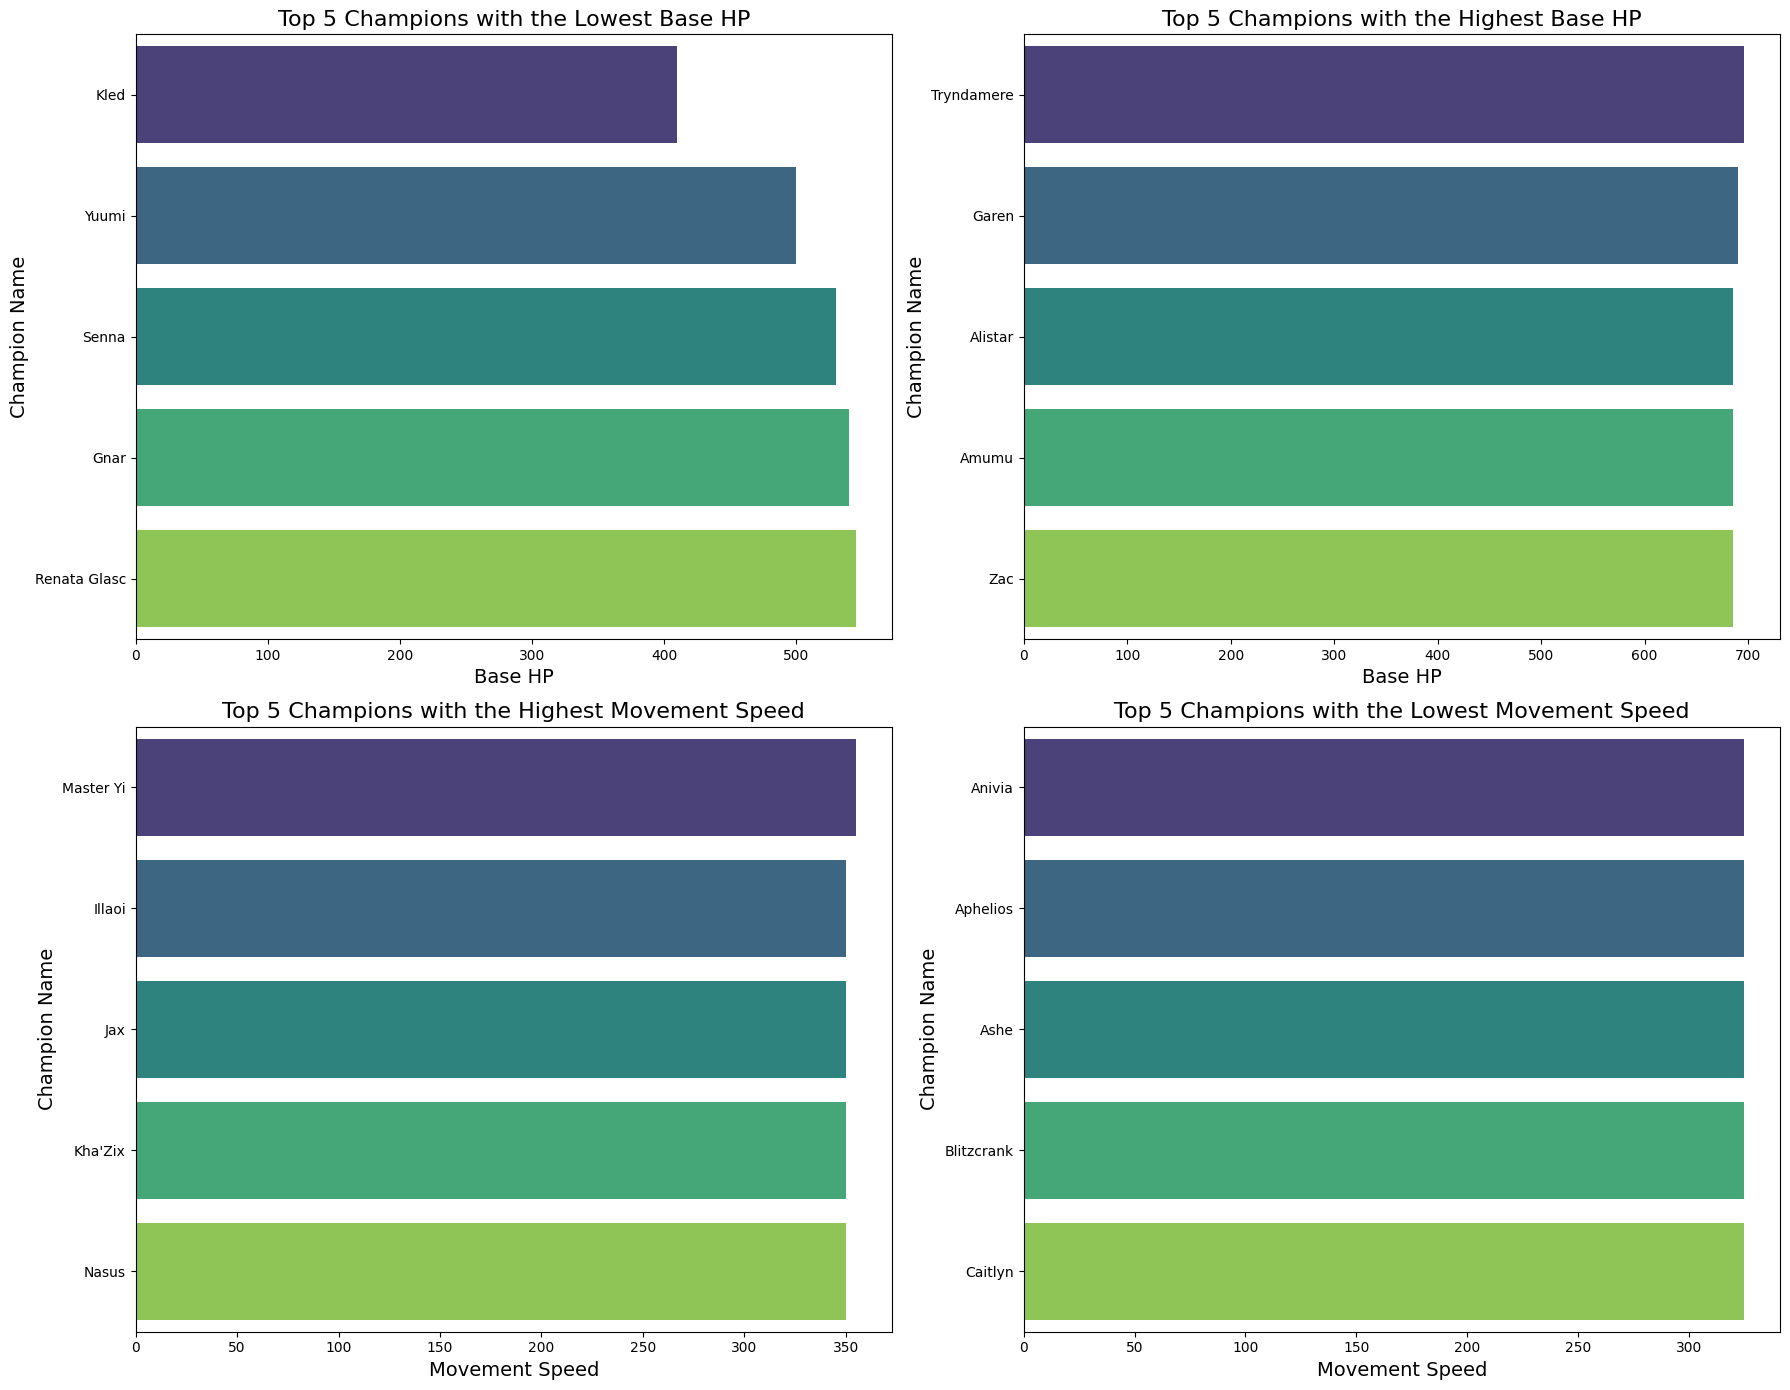

In [7]:
palette = sns.color_palette("viridis", 5)

# Create a figure and set of subplots
fig, axes = plt.subplots(2, 2, figsize=(18, 14))

# Plot for top 5 champions with the lowest base HP
sns.barplot(ax=axes[0, 0], x='Base HP', y='Name', data=top_5_lowest_hp, palette=palette)
axes[0, 0].set_title('Top 5 Champions with the Lowest Base HP', fontsize=16)
axes[0, 0].set_xlabel('Base HP', fontsize=14)
axes[0, 0].set_ylabel('Champion Name', fontsize=14)

# Plot for top 5 champions with the highest base HP
sns.barplot(ax=axes[0, 1], x='Base HP', y='Name', data=top_5_highest_hp, palette=palette)
axes[0, 1].set_title('Top 5 Champions with the Highest Base HP', fontsize=16)
axes[0, 1].set_xlabel('Base HP', fontsize=14)
axes[0, 1].set_ylabel('Champion Name', fontsize=14)

# Plot for top 5 champions with the highest movement speed
sns.barplot(ax=axes[1, 0], x='Movement speed', y='Name', data=top_5_highest_movement_speed, palette=palette)
axes[1, 0].set_title('Top 5 Champions with the Highest Movement Speed', fontsize=16)
axes[1, 0].set_xlabel('Movement Speed', fontsize=14)
axes[1, 0].set_ylabel('Champion Name', fontsize=14)

# Plot for top 5 champions with the lowest movement speed
sns.barplot(ax=axes[1, 1], x='Movement speed', y='Name', data=top_5_lowest_movement_speed, palette=palette)
axes[1, 1].set_title('Top 5 Champions with the Lowest Movement Speed', fontsize=16)
axes[1, 1].set_xlabel('Movement Speed', fontsize=14)
axes[1, 1].set_ylabel('Champion Name', fontsize=14)

# Adjust layout
plt.tight_layout()
plt.show()

# Distribution of Numerical Features
*Assess the distribution of these metrics to identify trends, ranges, and potential skewness in the data.*

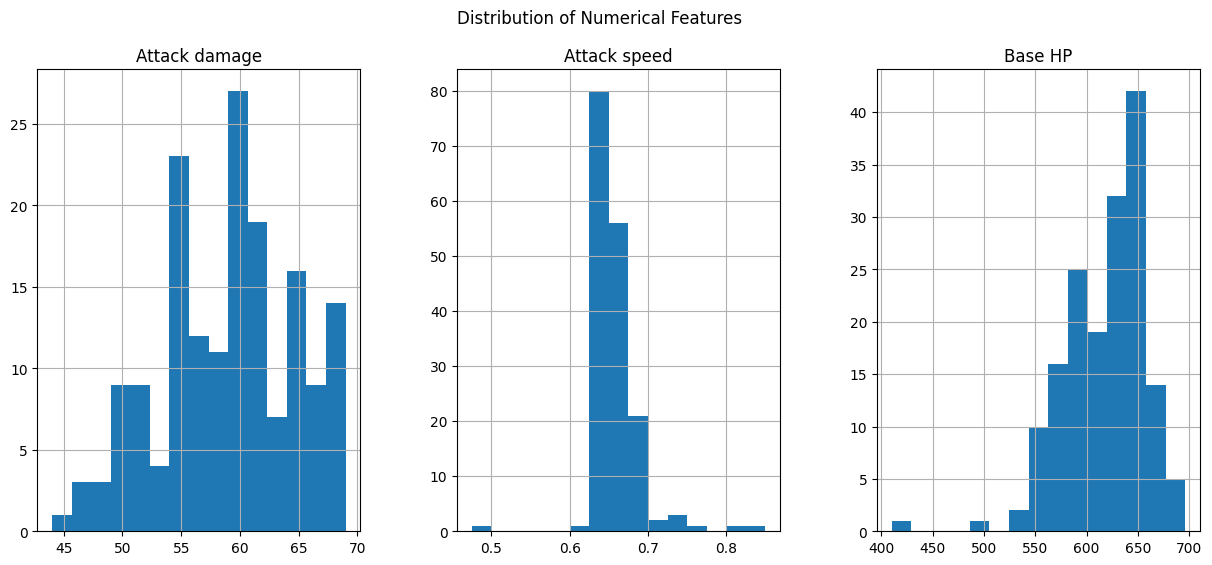

In [8]:
numerical_features = ['Attack damage', 'Attack speed', 'Base HP']
df[numerical_features].hist(bins=15, figsize=(15, 6), layout=(1, 3))
plt.suptitle('Distribution of Numerical Features')
plt.show()

# Count of Champions by Range Type
*Understand the proportion of melee versus ranged champions in the dataset.*

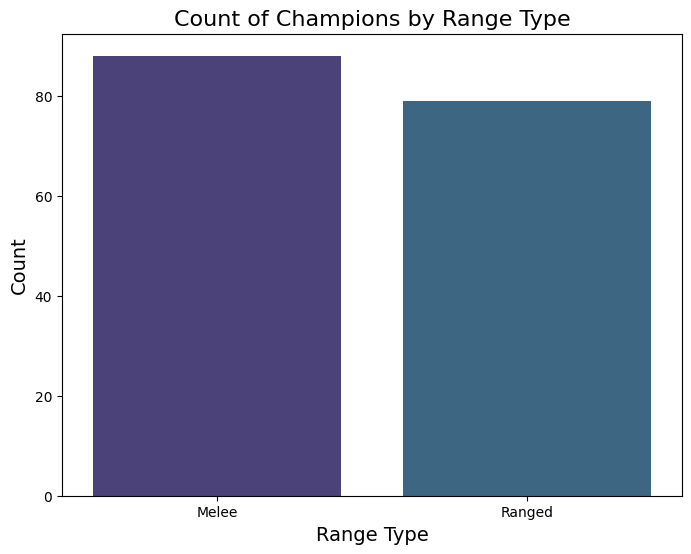

In [9]:
# Count of champions by range type
plt.figure(figsize=(8, 6))
sns.countplot(x='Range type', data=df, palette=palette)
plt.title('Count of Champions by Range Type', fontsize=16)
plt.xlabel('Range Type', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

# **Feature Engineering**

# Top 10 Champions by Overall Performance
*Evaluate overall champion performance by aggregating attack damage, attack speed, and base HP.*

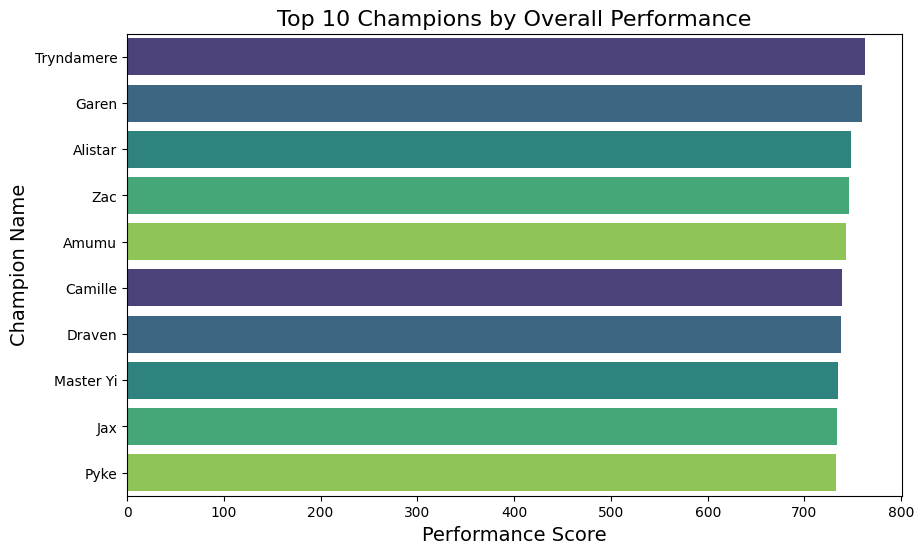

In [10]:
# Top 10 champions by overall performance
df['Performance Score'] = df['Attack damage'] + df['Attack speed'] + df['Base HP']
top_10_performance = df.nlargest(10, 'Performance Score')

plt.figure(figsize=(10, 6))
sns.barplot(x='Performance Score', y='Name', data=top_10_performance, palette=palette)
plt.title('Top 10 Champions by Overall Performance', fontsize=16)
plt.xlabel('Performance Score', fontsize=14)
plt.ylabel('Champion Name', fontsize=14)
plt.show()

# Relationship Between Attack Damage and Attack Speed
*Examine how attack damage correlates with attack speed and whether there are distinct patterns between melee and ranged champions.*

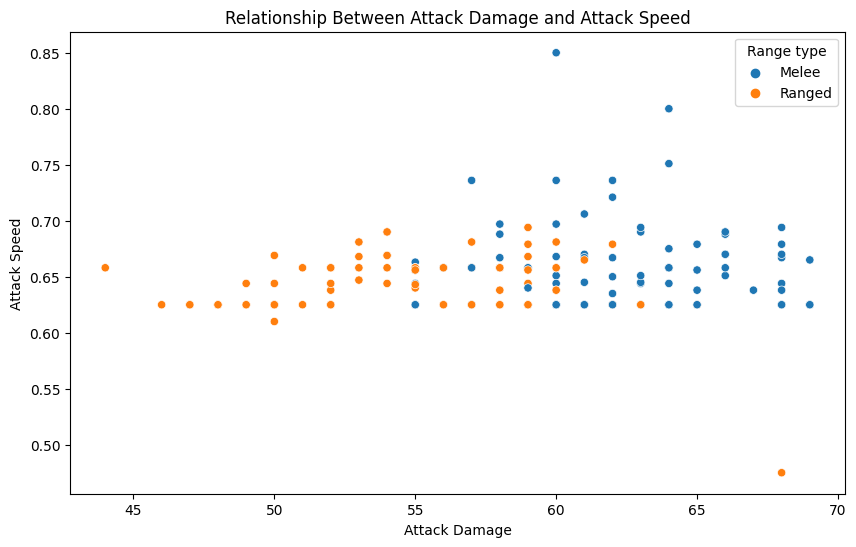

In [11]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Attack damage', y='Attack speed', hue='Range type', data=df)
plt.title('Relationship Between Attack Damage and Attack Speed')
plt.xlabel('Attack Damage')
plt.ylabel('Attack Speed')
plt.show()

# Combined Metric for Attack Damage and Attack Speed
*Identify champions who excel in both attack damage and attack speed, providing insight into their overall offensive capabilities.*

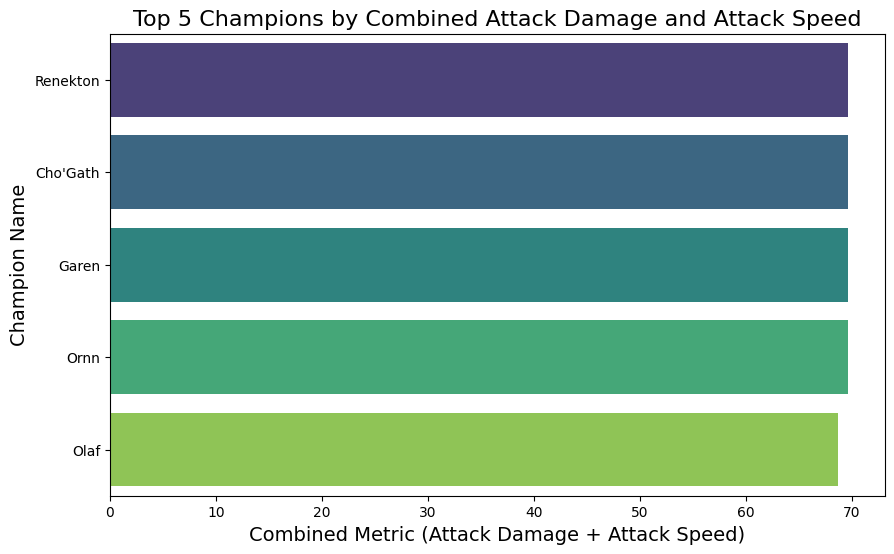

In [12]:
# Combined metric for attack damage and attack speed
df['Combined Metric'] = df['Attack damage'] + df['Attack speed']
top_5_combined = df.nlargest(5, 'Combined Metric')

plt.figure(figsize=(10, 6))
sns.barplot(x='Combined Metric', y='Name', data=top_5_combined, palette=palette)
plt.title('Top 5 Champions by Combined Attack Damage and Attack Speed', fontsize=16)
plt.xlabel('Combined Metric (Attack Damage + Attack Speed)', fontsize=14)
plt.ylabel('Champion Name', fontsize=14)
plt.show()